In [12]:
dbFiles <- c("https://resources.aertslab.org/cistarget/databases/mus_musculus/mm10/refseq_r80/mc9nr/gene_based/mm10__refseq-r80__500bp_up_and_100bp_down_tss.mc9nr.feather",
"https://resources.aertslab.org/cistarget/databases/mus_musculus/mm10/refseq_r80/mc9nr/gene_based/mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.feather")

In [13]:
for(featherURL in dbFiles)
{
  download.file(featherURL, destfile=basename(featherURL)) # saved in current dir
}

In [1]:
.libPaths("/home/garret/anaconda3/envs/Mon/lib/R/library")

In [27]:
dir.create("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/SCENIC_MPOA_AF_all_mm10"); setwd("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/SCENIC_MPOA_AF_all_mm10")

Warning message in dir.create("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/SCENIC_MPOA_AF_all_mm10"):
“'/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/SCENIC_MPOA_AF_all_mm10' already exists”


In [3]:
#library(GEOquery) # just in case
library(data.table)
library(RcisTarget)
library(igraph)
library(Seurat)
library(dplyr)
library(magrittr)

library(SingleCellExperiment)

library(xlsx)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRa

In [4]:
setwd("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/SCENIC_MPOA_AF_all_mm10")

In [5]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")

In [6]:
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)

In [7]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

In [8]:
celltype<-numeric()
for(i in 1:20){
    celltype<-c(celltype,eval(parse(text = paste("Vgat",i,"_barcode",sep=""))))
}

In [9]:
celltype<-intersect(celltype,rownames(subset(MPOA.integrated@meta.data,stim=="AF")))

In [10]:
MPOA<-subset(MPOA.integrated,cells=celltype)#only selecting Vgat AF

In [11]:
for (i in 1:dim(MPOA@meta.data)[1]){MPOA@meta.data$idents[i]<-as.character(Idents(MPOA)[[i]])}
as.factor(MPOA@meta.data$idents)

exprMatrix <- as.matrix(MPOA@assays$RNA@data) # using log normalized data, important

exprMatrix[1:5,1:4]

[1] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [11] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [21] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [31] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [41] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [51] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [61] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [71] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [81] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [91] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
 [101] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
 [111] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
 [121] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
 [131] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
 [141] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
 [151] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
 [161] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat2  Vgat2  Vgat2  Vgat2 
 [171] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [181] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [191] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [201] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [211] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [221] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [231] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2 
 [241] Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat2  Vgat3 
 [251] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [261] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [271] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [281] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [291] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [301] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [311] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [321] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [331] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [341] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [351] Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3  Vgat3 
 [361] Vgat3  Vgat3  Vgat3  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [371] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [381] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [391] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [401] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [411] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [421] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [431] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [441] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [451] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [461] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [471] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4 
 [481] Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat4  Vgat5  Vgat5 
 [491] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 
 [501] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 
 [511] Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5  Vgat5 

,ATGAGGGGTGTGCCTGAF,CACCAGGAGCTAGTTCAF,CCTAAAGCAGGCGATAAF,CGCTTCAAGCACGCCTAF
Xkr4,0,0,0,0
Sox17,0,0,0,0
Mrpl15,0,0,0,0
Lypla1,0,0,0,0
Tcea1,0,0,0,0


In [13]:
cellLabels<-as.data.frame(MPOA@meta.data$idents,row.names=rownames(MPOA@meta.data),col.names="CellType")        
dim(exprMatrix)

[1] 20345  1221

In [14]:
sceMouseBrain <- SingleCellExperiment(assays = list(counts = exprMatrix),
colData=data.frame(cellLabels[colnames(exprMatrix),, drop=FALSE]))

# setwd("SCENIC_MPOA_AM")
dir.create("data")
save(sceMouseBrain, file="data/sceMouseBrain.RData")


Warning message in dir.create("data"):
“'data' already exists”


In [17]:
# if you have previously saved sceMouseBrain, you can start from below

In [15]:
#setwd("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/SCENIC_MPOA_AM_all")
library(SingleCellExperiment)
load("data/sceMouseBrain.RData")
exprMat <- counts(sceMouseBrain)
dim(exprMat)

##-Cell info
cellInfo <- colData(sceMouseBrain)
cellInfo$nGene <- colSums(exprMat>0)
cellInfo <- data.frame(cellInfo)
head(cellInfo)

dir.create("int")

saveRDS(cellInfo, file="int/cellInfo.Rds")


[1] 20345  1221

,MPOA.meta.data.idents,nGene
,<fct>,<dbl>
ATGAGGGGTGTGCCTGAF,Vgat1,907
CACCAGGAGCTAGTTCAF,Vgat1,748
CCTAAAGCAGGCGATAAF,Vgat1,843
CGCTTCAAGCACGCCTAF,Vgat1,1131
CGGACTGTCAACGGCCAF,Vgat1,647
CGGTTAAGTTCAACCAAF,Vgat1,1006


Warning message in dir.create("int"):
“'int' already exists”


In [16]:
colVars <- list(CellType=setNames(c("green","darkgreen","forestgreen", "darkorange", "magenta4", "magenta3", "magenta2", "magenta1", "pink","darkred","hotpink", "red3", "red2", "red1", "red4", "blue","lightblue","skyblue", "darkblue","black"), 
   c("Vgat6","Vgat2","Vgat16","Vgat4","Vgat10","Vgat13","Vgat8","Vgat17","Vgat1","Vgat3","Vgat14","Vgat5","Vgat7","Vgat11","Vgat9","Vgat19","Vgat15","Vgat18","Vgat12","Vgat20")))

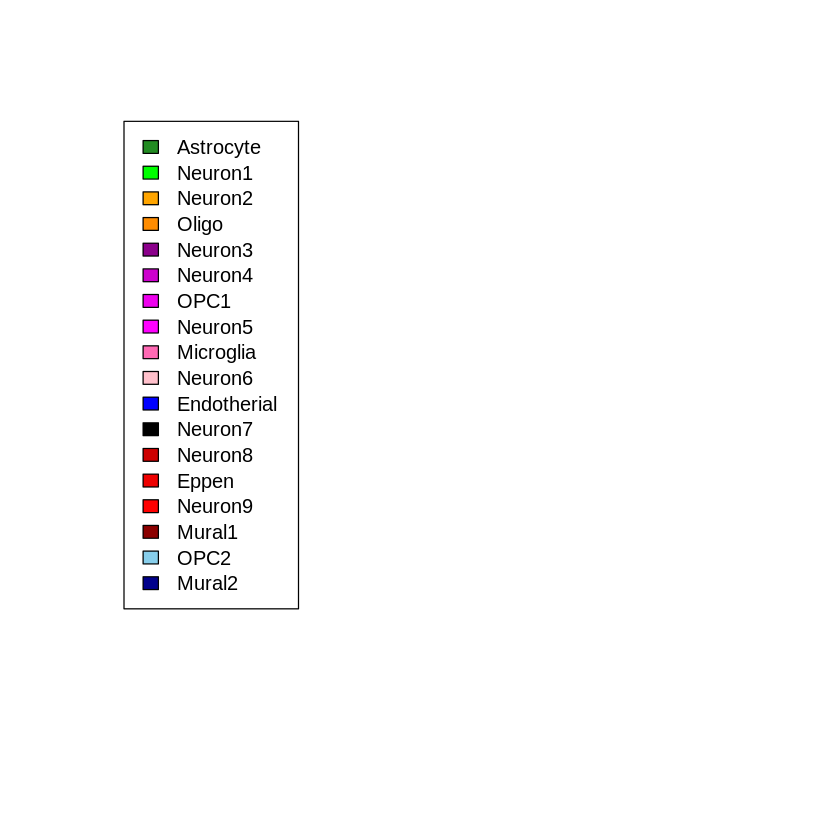

In [17]:
colVars <- list(CellType=setNames(c("forestgreen", "green","orange","darkorange","magenta4", "magenta3", "magenta2", "magenta1", "hotpink","pink", "blue","black","red3", "red2", "red1", "red4", "skyblue", "darkblue"), 
   c("Astrocyte","Neuron1","Neuron2","Oligo","Neuron3","Neuron4","OPC1","Neuron5","Microglia","Neuron6","Endotherial","Neuron7","Neuron8","Eppen","Neuron9","Mural1","OPC2","Mural2")))
saveRDS(colVars, file="int/colVars.Rds")
plot.new(); legend(0,1, fill=colVars$CellType, legend=names(colVars$CellType))


In [19]:

library(SCENIC)
org="mgi" # or hgnc, or dmel
dbDir="/home/garret/Documents/R code/SCENIC/cisTarget_databases" # RcisTarget databases location
myDatasetTitle="SCENIC example on Mouse brain" # choose a name for your analysis
scenicOptions <- initializeScenic(org=org, dbDir=dbDir, datasetTitle=myDatasetTitle, nCores=6) # I may need to use 4


Motif databases selected: 
  mm9-500bp-upstream-7species.mc9nr.feather 
  mm9-tss-centered-10kb-7species.mc9nr.feather



In [17]:
#setwd("SCENIC_MPOA_AM_all")
scenicOptions@inputDatasetInfo$cellInfo <- "int/cellInfo.Rds"
scenicOptions@inputDatasetInfo$colVars <- "int/colVars.Rds"


# Save to use at a later time...
saveRDS(scenicOptions, file="int/scenicOptions.Rds") 


In [18]:
library("feather")

In [19]:
genesKept <- geneFiltering(exprMat, scenicOptions= scenicOptions, minCountsPerGene = 3 * 0.005 *
  ncol(exprMat), minSamples = ncol(exprMat) * 0.01)


Maximum value in the expression matrix: 8.19920905407113

Ratio of detected vs non-detected: 0.14

Number of counts (in the dataset units) per gene:



    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    2.288   47.279  191.053  226.210 6981.551 


Number of cells in which each gene is detected:



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     2.0    48.0   150.7   220.0  1221.0 



Number of genes left after applying the following filters (sequential):

	11983	genes with counts per gene > 18.315

	11980	genes detected in more than 12.21 cells

	10403	genes available in RcisTarget database

Gene list saved in int/1.1_genesKept.Rds



In [20]:
library("foreach")
#---------------------------------------------------------
#double check
interestingGenes <- c("Esr1", "Ar", "Dlx1","Nfix")
interestingGenes[which(!interestingGenes %in% genesKept)]

character(0)

In [21]:
exprMat_filtered <- exprMat[genesKept, ]
dim(exprMat_filtered)
rm(exprMat)
0

[1] 10403  1221

[1] 0

In [22]:
corrMat <- cor(t(exprMat_filtered), method="spearman")
# (Only the rows for TFs will be needed needed):
# allTFs <- getDbTfs(scenicOptions)
# corrMat <- corrMat[which(rownames(corrMat) %in% allTFs),]
saveRDS(corrMat, file=getIntName(scenicOptions, "corrMat"))


In [23]:

# Run GENIE3
runGenie3(exprMat_filtered, scenicOptions)


Using 972 TFs as potential regulators...

Running GENIE3 part 1

Running GENIE3 part 2

Running GENIE3 part 3

Running GENIE3 part 4

Running GENIE3 part 5

Running GENIE3 part 6

Running GENIE3 part 7

Running GENIE3 part 8

Running GENIE3 part 9

Running GENIE3 part 10

Finished running GENIE3.



In [15]:
library(SingleCellExperiment)
library(data.table)
#setwd("SCENIC_MPOA_AM_all")
load("data/sceMouseBrain.RData")
exprMat <- counts(sceMouseBrain) 
# Optional: log expression (for TF expression plot, it does not affect any other calculation)
#exprMat <- log2(exprMat+1)
dim(exprMat)

library(SCENIC)
library("BiocParallel") # require function "register"

scenicOptions <- readRDS("int/scenicOptions.Rds")
scenicOptions@settings$verbose <- TRUE
scenicOptions@settings$nCores <- 6# default is 20 
scenicOptions@settings$seed <- 123
library(BiocParallel) 
registered()

[1] 20345  1221

$MulticoreParam
class: MulticoreParam
  bpisup: FALSE; bpnworkers: 6; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: FORK

$SnowParam
class: SnowParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: SOCK

$SerialParam
class: SerialParam
  bpisup: FALSE; bpnworkers: 1; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA


In [16]:

scenicOptions <- readRDS("int/scenicOptions.Rds")
scenicOptions@settings$verbose <- TRUE
scenicOptions@settings$nCores <- 6 # default is 20 
scenicOptions@settings$seed <- 123
library(BiocParallel) 
registered() # your current settings
register(MulticoreParam(workers=6), default = TRUE) 
#register(SnowParam(workers=1), default = FALSE)
#register(SerialParam(), default = TRUE)
system.time(bplapply(1:1000, sqrt))
registered()



$MulticoreParam
class: MulticoreParam
  bpisup: FALSE; bpnworkers: 6; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: FORK

$SnowParam
class: SnowParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: SOCK

$SerialParam
class: SerialParam
  bpisup: FALSE; bpnworkers: 1; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA


   user  system elapsed 
  0.123   0.047   0.058 

$MulticoreParam
class: MulticoreParam
  bpisup: FALSE; bpnworkers: 6; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: FORK

$SnowParam
class: SnowParam
  bpisup: FALSE; bpnworkers: 10; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA
  cluster type: SOCK

$SerialParam
class: SerialParam
  bpisup: FALSE; bpnworkers: 1; bptasks: 0; bpjobname: BPJOB
  bplog: FALSE; bpthreshold: INFO; bpstopOnError: TRUE
  bpRNGseed: ; bptimeout: 2592000; bpprogressbar: FALSE
  bpexportglobals: TRUE
  bplogdir: NA
  bpresultdir: NA


In [18]:
library(SCENIC)
org="mgi" # or hgnc, or dmel
dbDir="/home/garret/Documents/R code/SCENIC/cisTarget_databases" # RcisTarget databases location
myDatasetTitle="SCENIC example on Mouse brain" # choose a name for your analysis
scenicOptions <- initializeScenic(org=org, dbDir=dbDir, datasetTitle=myDatasetTitle, nCores=6) # I may need to use 4

ERROR: Error in initializeScenic(org = org, dbDir = dbDir, datasetTitle = myDatasetTitle, : The following RcisTarget databases were not found: 
- /home/garret/Documents/R code/SCENIC/cisTarget_databases/mm10/mm9-500bp-upstream-7species.mc9nr.feather 
- /home/garret/Documents/R code/SCENIC/cisTarget_databases/mm10/mm9-tss-centered-10kb-7species.mc9nr.feather
Make sure the arguments 'dbDir' and 'dbs' are correct.


In [36]:
scenicOptions@settings

$dbs
                                         500bp 
   "mm9-500bp-upstream-7species.mc9nr.feather" 
                                          10kb 
"mm9-tss-centered-10kb-7species.mc9nr.feather" 

$dbDir
[1] "/home/garret/Documents/R code/SCENIC/cisTarget_databases"

$db_mcVersion
[1] "v9"

$verbose
[1] TRUE

$nCores
[1] 6

$seed
[1] 123

$devType
[1] "pdf"

$modules
$modules$weightThreshold
[1] 0.001


$regulons
list()

$aucell
$aucell$smallestPopPercent
[1] 0.25


$defaultTsne
$defaultTsne$dims
[1] 50

$defaultTsne$perpl
[1] 50

$defaultTsne$aucType
[1] "AUC"


$tSNE_filePrefix
[1] "int/tSNE"

In [8]:
#BiocParallel::register(BiocParallel::SerialParam())
runSCENIC_1_coexNetwork2modules(scenicOptions)
#install.packages("rstan")
library("rstan")
runSCENIC_2_createRegulons(scenicOptions)

18:25	Creating TF modules



        75%         90% 
0.002219664 0.003200822 


Number of links between TFs and targets: 3723740



             [,1]
nTFs          972
nTargets    10403
nGeneSets    5832
nLinks    4562468


Loading required package: ggplot2

Loading required package: StanHeaders

Registered S3 method overwritten by 'cli':
  method     from    
  print.boxx spatstat

rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


Attaching package: ‘rstan’


The following object is masked from ‘package:magrittr’:

    extract


18:26	Step 2. Identifying regulons


Attaching package: ‘AUCell’


The following object is masked from ‘package:SingleCellExperiment’:

    cbind


The following object is masked from ‘package:SummarizedExperiment’:

    cbind


The following object is masked from ‘package:DelayedArray’:

    cbind


The following object is masked from ‘package:IRanges’:

    cbind


The following object is masked from ‘package:S4Vectors’:

    cbind


The following object is


 top5perTarget top10perTarget           w005          top50 top50perTarget 
           618            929            957            961            972 
          w001 
           972 


18:26	RcisTarget: Calculating AUC

Scoring database:  [Source file: mm9-500bp-upstream-7species.mc9nr.feather]

Scoring database:  [Source file: mm9-tss-centered-10kb-7species.mc9nr.feather]

19:13	RcisTarget: Adding motif annotation

Number of motifs in the initial enrichment: 2319152

Number of motifs annotated to the matching TF: 13356

19:16	RcisTarget: Prunning targets

20:35	Number of motifs that support the regulons: 13356

	Preview of motif enrichment saved as: output/Step2_MotifEnrichment_preview.html



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     8.0    23.0   377.9   199.8  5944.0 

In [9]:
runSCENIC_3_scoreCells(scenicOptions, exprMat)

20:36	Step 3. Analyzing the network activity in each individual cell

	Number of regulons to evaluate on cells: 386
Biggest (non-extended) regulons: 
	 Taf1 (4767g)
	 Nr3c1 (3335g)
	 Bclaf1 (1561g)
	 Ep300 (1430g)
	 E2f6 (1423g)
	 Yy1 (1411g)
	 Ets2 (1387g)
	 Etv3 (1348g)
	 Elk1 (1315g)
	 Rbbp5 (1257g)

Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



   min     1%     5%    10%    50%   100% 
 519.0  685.4  893.0 1020.0 2680.0 4939.0 


Using 6 cores.

Using 6 cores.

20:36	Finished running AUCell.

20:36	Plotting heatmap...

20:37	Plotting t-SNEs...



png 
  2

In [10]:
aucellApp <- plotTsne_AUCellApp(scenicOptions, exprMat)
#savedSelections <- shiny::runApp(aucellApp)

# Save the modified thresholds:
#newThresholds <- savedSelections$thresholds
#scenicOptions@fileNames$int["aucell_thresholds",1] <- "int/newThresholds.Rds"
#saveRDS(newThresholds, file=getIntName(scenicOptions, "aucell_thresholds"))
#saveRDS(scenicOptions, file="int/scenicOptions.Rds")
runSCENIC_4_aucell_binarize(scenicOptions)

Loading required package: rbokeh


Attaching package: ‘rbokeh’


The following object is masked from ‘package:ggplot2’:

    arrow


Binary regulon activity: 261 TF regulons x 1221 cells.
(362 regulons including 'extended' versions)
230 regulons are active in more than 1% (12.21) cells.

Warning message in AUCell_plotTSNE(tSNE = tSNE, exprMat = exprMat, cellsAUC = regulonAUC, :
“Expression plot was requested, but no expression matrix provided.”


png 
  2

# ranking the TFs using socres of coexpression

In [2]:
Coexpression<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/1.4_GENIE3_linkList.Rds")

In [3]:
#201030
DEG<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_OVX/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)

In [4]:
DEG<-subset(DEG,avg_logFC>0.25)[,1]

In [5]:
Coexpression<-Coexpression[Coexpression$Target %in% DEG,]

In [6]:
length(unique(Coexpression$TF))

[1] 952

In [6]:
TF<-unique(Coexpression$TF)

In [7]:
score<-numeric()
for (i in 1:length(TF)){
    score[i]<-sum(subset(Coexpression,TF==TF[i])$weight)
}
summary<-data.frame("TF"=TF,"score"=score)

In [8]:
summary<-summary[order(-summary$score),]

In [124]:
write.table(summary,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/co_expression_Esr1_3_summary_FC0.25.csv",col.names =TRUE,row.names=TRUE)

In [123]:
head(summary)

,TF,score
,<fct>,<dbl>
1,Esr1,1.212837
3,Egr2,1.212837
4,Pgr,1.212837
5,Ywhaz,1.212837
6,Zbtb20,1.212837
7,Rorb,1.212837


In [9]:
summary$TF<-factor(summary$TF,level=summary$TF)

In [10]:
color<-numeric()
size<-numeric()
for(i in 1:dim(summary)[1]){
    if(summary$TF[i]=="Esr1" |summary$TF[i]=="Pgr" | summary$TF[i]=="Ar"){
        color[i]<-"white"
        size[i]<-6
    }else{
        color[i]<-"white"
        size[i]<- 0
    }
}

In [11]:
library(ggplot2)

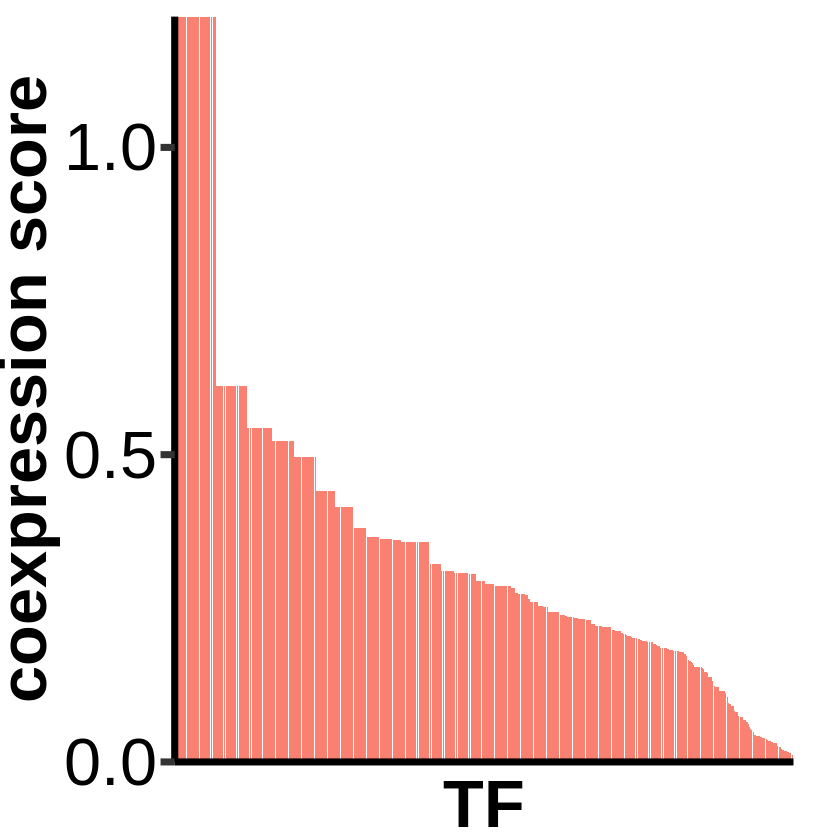

In [12]:
ggplot(summary,aes(x=TF,y=score))+geom_bar(stat = "identity", fill="salmon")+ylab("coexpression score")+
theme(axis.text.x=element_blank(),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=40,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.ticks.x = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),  axis.ticks.y = element_line(size=2) , plot.margin = margin(10, 28, 0, 0))+
scale_y_continuous(expand = c(0, 0),breaks=seq(0,1.28,0.5))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/TF_coexpression_Esr1_3_150narrow_FC0.25.pdf",height=4.5, width=6 , paper = "letter")

finding enriched motifs

https://bioconductor.org/packages/release/bioc/vignettes/RcisTarget/inst/doc/RcisTarget.html

In [2]:
.libPaths("/home/garret/anaconda3/envs/Mon/lib/R/library")

In [4]:
library(RcisTarget)

In [4]:
genes<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)

In [5]:
genes<-as.character(genes[,1])

In [6]:
motifRankings <- importRankings("/home/garret/Documents/R code/SCENIC/cisTarget_databases/mm9-tss-centered-10kb-7species.mc9nr.feather")
data(motifAnnotations_mgi)

In [10]:
#genes<-as.character(unique(Coexpression$Target))

In [107]:
target<-numeric()
for(i in 1:length(genes)){
motifEnrichmentTable<-numeric()
geneLists<-numeric()
motifs_AUC<-numeric()
geneSet1<-genes[i]
geneLists <- list(geneSetName=geneSet1)
try(motifEnrichmentTable_wGenes <- cisTarget(geneLists, motifRankings, motifAnnot=motifAnnotations_mgi),silent=TRUE)
try(motifs_AUC <- calcAUC(geneLists, motifRankings, nCores=1),silent=TRUE)
try(motifEnrichmentTable <- addMotifAnnotation(motifs_AUC, nesThreshold=2,motifAnnot=motifAnnotations_mgi, highlightTFs=list(geneSetName="Esr1")),silent=TRUE)
if(sum(exists("motifEnrichmentTable"))==0){target<-target}
else if(is.null(dim(motifEnrichmentTable)[1])){target<-target}
else if(dim(motifEnrichmentTable)[1]==0){target<-target}
else if(dim(subset(motifEnrichmentTable,TFinDB=="**"))[1]>0){target<-c(target,genes[i])}
else{ target<-target}
}


In [109]:
write.csv(target,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/Esr1_direct_target_KO_female.csv")

In [42]:
length(Esr1_target)

[1] 148

In [110]:
length(target)

[1] 123

In [ ]:
#test the result


In [111]:
genes<-c("Unc5d","","Meg3","Zmat4","Rab27b","Pard3","Prkacb","Nrip1","Tmod2","Fgfr1")

In [100]:
genes<-genes[10]

In [101]:
genes

[1] "Ar"

In [112]:
mtarget<-numeric()
for(i in 1:length(genes)){
motifEnrichmentTable<-numeric()
geneLists<-numeric()
motifs_AUC<-numeric()
geneSet1<-genes[i]
geneLists <- list(geneSetName=geneSet1)
try(motifEnrichmentTable_wGenes <- cisTarget(geneLists, motifRankings, motifAnnot=motifAnnotations_mgi),silent=TRUE)
try(motifs_AUC <- calcAUC(geneLists, motifRankings, nCores=1),silent=TRUE)
try(motifEnrichmentTable <- addMotifAnnotation(motifs_AUC, nesThreshold=2,motifAnnot=motifAnnotations_mgi, highlightTFs=list(geneSetName="Esr1")),silent=TRUE)
if(sum(exists("motifEnrichmentTable"))==0){mtarget<-mtarget}
else if(is.null(dim(motifEnrichmentTable)[1])){mtarget<-mtarget}
else if(dim(motifEnrichmentTable)[1]==0){mtarget<-mtarget}
else if(dim(subset(motifEnrichmentTable,TFinDB=="**"))[1]>0){mtarget<-c(mtarget,genes[i])}
else{ mtarget<-mtarget}
}

In [113]:
mtarget

[1] "Unc5d"  "Meg3"   "Zmat4"  "Rab27b" "Pard3"  "Prkacb" "Nrip1"  "Tmod2" 
[9] "Fgfr1"

In [14]:
# calculating nubmer of DEGs
Esr1KO<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)[,1]
GDX<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_OVX/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
Vgatlow<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/low/gene_adjust_0.1_0.1_2416vs5.xlsx",sheetIndex=1)[,1]

In [15]:
length(intersect(Esr1KO,GDX))
100*length(intersect(Esr1KO,GDX))/length(GDX)
length(intersect(Esr1KO,Vgatlow))
100*length(intersect(Esr1KO,Vgatlow))/length(Esr1KO)

[1] 124

[1] 73.37278

[1] 27

[1] 3.276699

# Indirect regulation

In [21]:
#201109
Coexpression<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/1.4_GENIE3_linkList.Rds")
DEG<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)[,1]
Coexpression<-Coexpression[Coexpression$Target %in% DEG,]
TF<-unique(Coexpression$TF)

In [22]:
length(DEG)

[1] 824

In [23]:
genes<-as.character(TF)

In [24]:
motifRankings <- importRankings("/home/garret/Documents/R code/SCENIC/cisTarget_databases/mm9-tss-centered-10kb-7species.mc9nr.feather")
data(motifAnnotations_mgi)

In [9]:
#201109
target<-numeric()
for(i in 1:length(genes)){
motifEnrichmentTable<-numeric()
geneLists<-numeric()
motifs_AUC<-numeric()
geneSet1<-genes[i]
geneLists <- list(geneSetName=geneSet1)
try(motifEnrichmentTable_wGenes <- cisTarget(geneLists, motifRankings, motifAnnot=motifAnnotations_mgi),silent=TRUE)
try(motifs_AUC <- calcAUC(geneLists, motifRankings, nCores=1),silent=TRUE)
try(motifEnrichmentTable <- addMotifAnnotation(motifs_AUC, nesThreshold=2,motifAnnot=motifAnnotations_mgi, highlightTFs=list(geneSetName="Esr1")),silent=TRUE)
if(sum(exists("motifEnrichmentTable"))==0){target<-target}
else if(is.null(dim(motifEnrichmentTable)[1])){target<-target}
else if(dim(motifEnrichmentTable)[1]==0){target<-target}
else if(dim(subset(motifEnrichmentTable,TFinDB=="**"))[1]>0){target<-c(target,genes[i])}
else{ target<-target}
}

In [11]:
#201109
write.csv(target,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/Esr1_indirect_target.csv")

In [25]:
library(tidyverse)

Registered S3 method overwritten by 'cli':
  method     from    
  print.boxx spatstat

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.2     ✔ stringr 1.4.0
✔ tidyr   1.1.0     ✔ forcats 0.5.0
✔ readr   1.3.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tibble::as_data_frame() masks dplyr::as_data_frame(), igraph::as_data_frame()
✖ dplyr::between()        masks data.table::between()
✖ IRanges::collapse()     masks dplyr::collapse()
✖ Biobase::combine()      masks BiocGenerics::combine(), dplyr::combine()
✖ purrr::compose()        masks igraph::compose()
✖ matrixStats::count()    masks dplyr::count()
✖ tidyr::crossing()       masks igraph::crossing()
✖ IRanges::desc()         masks dplyr::desc()
✖ tidyr::expand()         masks S4Vectors::expand()
✖ tidyr::extract()        masks magrittr::extract()
✖ dplyr::filter()         masks stats::filter()
✖ S4Vectors::fi

In [8]:
Esr1_target<-read_csv("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/Esr1_indirect_target.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  x = col_character()
)



In [9]:
Esr1_target<-Esr1_target[[2]]
KO_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)

In [10]:
KO_gene<-as.character(KO_gene[,1])
Esr1_TF<-intersect(intersect(TF,KO_gene),Esr1_target)

In [12]:
Esr1_TF
length(KO_gene)
length(Esr1_TF)
length(Esr1_target)

[1] "Esr1"    "Rps10"   "Zbtb20"  "Creb3l1" "Tcf4"    "Bcl11a"  "Sox5"   
 [8] "Zmat4"   "Zfp280d" "Lrrfip1"

[1] 824

[1] 10

[1] 179

In [127]:
Esr1_TF

[1] "Esr1"    "Zbtb20"  "Creb3l1" "Tcf4"    "Rps10"   "Bcl11a"  "Sox5"   
 [8] "Zmat4"   "Lrrfip1" "Zfp280d"

In [ ]:
#constructing regulons

In [17]:
regulons<-vector(mode = "list")

In [18]:
motifRankings <- importRankings("/home/garret/Documents/R code/SCENIC/cisTarget_databases/mm9-tss-centered-10kb-7species.mc9nr.feather")
data(motifAnnotations_mgi)

In [19]:
#201109
for(j in 1:length(Esr1_TF)){
temp_target<-numeric()
for(i in 1:length(KO_gene)){
motifEnrichmentTable<-numeric()
geneLists<-numeric()
motifs_AUC<-numeric()   
geneSet1<-KO_gene[i]
geneLists <- list(geneSetName=KO_gene[i])
try(motifEnrichmentTable_wGenes <- cisTarget(geneLists, motifRankings, motifAnnot=motifAnnotations_mgi),silent=TRUE)
try(motifs_AUC <- calcAUC(geneLists, motifRankings, nCores=1),silent=TRUE)
try(motifEnrichmentTable <- addMotifAnnotation(motifs_AUC, nesThreshold=2,motifAnnot=motifAnnotations_mgi, highlightTFs=list(geneSetName=Esr1_TF[j])),silent=TRUE)
if(sum(exists("motifEnrichmentTable"))==0){temp_target<-temp_target}
else if(is.null(dim(motifEnrichmentTable)[1])){temp_target<-temp_target}
else if(dim(motifEnrichmentTable)[1]==0){temp_target<-temp_target}
else if(dim(subset(motifEnrichmentTable,TFinDB=="**"))[1]>0){temp_target<-c(temp_target,KO_gene[i])}
else{ temp_target<-temp_target}
}
    regulons[[Esr1_TF[j]]]<-temp_target
                              }

In [20]:
#201109
saveRDS(regulons,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/regulons_indirect.rds")

In [26]:
test<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/regulons_indirect.rds")

In [27]:
names(test)

[1] "Esr1"    "Rps10"   "Zbtb20"  "Creb3l1" "Tcf4"    "Bcl11a"  "Sox5"   
 [8] "Zmat4"   "Zfp280d" "Lrrfip1"

---------------------------------------------------

In [15]:
sum<-numeric()
for(i in 1:length(test)){
    sum<-c(sum,test[[i]])
}

In [21]:
length(unique(sum))

[1] 462

In [19]:
length(test$Esr1)
100*length(test$Esr1)/length(KO_gene)
100*length(unique(sum))/length(KO_gene)


[1] 123

[1] 14.92718

[1] 56.06796

In [22]:
#the number excluding Esr1
sum<-numeric()
for(i in 2:length(test)){
    sum<-c(sum,test[[i]])
}
length(unique(sum))
100*length(unique(sum))/length(KO_gene)

[1] 446

[1] 54.12621

In [23]:
#dimorphism
male<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1_246vs34.xlsx",sheetIndex=1)
male<-as.character(male[,1])
common<-intersect(KO_gene,male)
100*(length(KO_gene)-length(common))/length(KO_gene)

[1] 58.37379

In [25]:
female_TF<-names(test)
male_TF<-names(readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/regulons_indirect.rds"))
length(female_TF)-length(intersect(female_TF,male_TF))

[1] 6

# constructing regulons

In [43]:
regulons<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/regulons_indirect.rds")

In [44]:
KO_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)

In [45]:
KO_gene<-as.character(KO_gene[,1])

In [46]:
test<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/regulons_indirect.rds")
sum<-numeric()
for(i in 1:length(test)){
    sum<-c(sum,test[[i]])
}

In [47]:
sum<-unique(sum)

In [48]:
TF<-names(regulons)

In [49]:
sum<-unique(c(sum,TF))

In [50]:
KO_gene<-sum

In [51]:
library(igraph)

In [52]:
length(KO_gene)

[1] 462

In [53]:
data<-matrix(NA, ncol=length(KO_gene),nrow=length(KO_gene))
colnames(data)=rownames(data)=KO_gene

In [54]:
for(i in 1:length(KO_gene)){
    for(j in 1:length(KO_gene)){
      if((rownames(data)[i] %in% TF) & (colnames(data)[j] %in% regulons[[rownames(data)[i]]])) 
         {data[i,j]<- 1}
         else{data[i,j]<- 0}
    }
}

In [55]:
network<-graph_from_adjacency_matrix(data)

In [86]:
#201110
saveRDS(network,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/network.rds")

In [14]:
network<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/network.rds")

In [56]:
tf<-TF[TF != "Esr1"]

In [48]:
#201110
write.xlsx2(KO_gene,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/Esr1_KO_genes_regulone.xlsx")

In [57]:
# ontology 201110
Neuron_BP<-read.table(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/GO_Biological_Process_2018_table.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")
Neuron_MF<-read.table(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/GO_Molecular_Function_2018_table.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")
Neuron_CC<-read.table(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/GO_Cellular_Component_2018_table.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")
Neuron_BP<-Neuron_BP[order(Neuron_BP$Adjusted.P.value),]
Neuron_MF<-Neuron_MF[order(Neuron_MF$Adjusted.P.value),]
Neuron_CC<-Neuron_CC[order(Neuron_CC$Adjusted.P.value),]
Neuron_BP<-subset(Neuron_BP,Adjusted.P.value<0.2)
Neuron_MF<-subset(Neuron_MF,Adjusted.P.value<0.2)
Neuron_CC<-subset(Neuron_CC,Adjusted.P.value<0.2)
Neuron_BP$Term<-gsub('.{12}$','',as.character(Neuron_BP$Term))
Neuron_MF$Term<-gsub('.{12}$','',as.character(Neuron_MF$Term))
Neuron_CC$Term<-gsub('.{12}$','',as.character(Neuron_CC$Term))

In [58]:
p<-17
Neuron_CC$Genes[p]
Neuron_CC$Term[p]
CC_term<-c("gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","synapse","gene_expression","gene_expression",
           "synapse","synapse")

[1] GABRQ;GABRA3;GABRE;GABRG1
237 Levels: ABRAXAS2 ACBD5;AGPS;HMGCR ANK3 APH1B;TMED10 ... ZYG11B;CUL2;RNF7

[1] "GABA-A receptor complex "

In [59]:
gene_expression_CC<-numeric()
synapse_CC<-numeric()
#membrane_conductance_CC<-numeric()
energy_CC<-numeric()
morphology_CC<-numeric()

for(i in 1:length(CC_term)){
    if(CC_term[i]=="gene_expression"){
        gene_expression_CC<-c(gene_expression_CC,unlist(strsplit(as.character(Neuron_CC$Genes[i]), "\\;")))
    }else if(CC_term[i]=="synapse"){
        synapse_CC<-c(synapse_CC,unlist(strsplit(as.character(Neuron_CC$Genes[i]), "\\;")))
    }else if(CC_term[i]=="energy"){
        energy_CC<-c(energy_CC,unlist(strsplit(as.character(Neuron_CC$Genes[i]), "\\;")))
    }else if(CC_term[i]=="morphology"){
        morphology_CC<-c(morphology_CC,unlist(strsplit(as.character(Neuron_CC$Genes[i]), "\\;")))
    }
}
gene_expression_CC<-unique(gene_expression_CC)
synapse_CC<-unique(synapse_CC)
energy_CC<-unique(energy_CC)
morphology_CC<-unique(morphology_CC)

In [60]:
library(stringr) 

In [61]:
gene_expression_CC<-str_to_title(gene_expression_CC)
synapse_CC<-str_to_title(synapse_CC)
morphology_CC<-str_to_title(morphology_CC)
energy_CC<-str_to_title(energy_CC)

In [62]:
Neuron_MF

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
,<chr>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>
1,RNA binding,128/1387,2.440765e-18,2.809321e-15,0,0,2.239940,90.83900,EIF4A2;RPL4;RPL5;RPL30;RPL31;ADARB2;RPL8;RPL9;CCAR1;RPL7;RPS15;RPS17;RPS16;SNRPD1;RPS11;RPL39;RPS10;RPS13;EIF2A;PDIA3;RPL21;RPS7;RPS8;RPL23;RPL22;DDX10;RPSA;LARP4B;TRNT1;ILF2;GTPBP4;DHX40;EEF1A1;HNRNPUL2;NCL;SBDS;SRSF3;MATR3;RPL26;EIF1B;KPNB1;SLBP;KHDRBS1;ZCCHC7;RPS19BP1;DHX9;NMD3;RTN4;HSP90B1;ZMAT4;MYH10;DARS;PNPT1;PCDH20;NONO;EIF1;RPS25;MEX3B;EIF5;RPL27A;RPS20;GRSF1;RPS21;EIF4G2;RPS24;RPS23;HSP90AB1;GDI2;ELAVL4;MRPL32;RPS4X;MRPL42;SYNCRIP;RPL7A;PCF11;TMSB4X;SUMO2;RACK1;LRRFIP1;RBM7;HSP90AA1;SRP9;PTBP3;PSMA6;NEMF;SLTM;TCP1;STRAP;DCP2;LUC7L2;RNMT;RPL12;SF3B6;RPS27L;TROVE2;HSPD1;BCLAF1;RPS15A;SRP72;PUF60;EXOSC9;RPS3;RPS2;RPS27A;RPL17;SRSF12;CCT4;RPL19;NOP56;NPM1;SSB;TAF15;NIFK;KRR1;CNBP;FAM46A;RPL35A;RPL23A;NAP1L1;HSPE1;NUDT21;HNRNPA2B1;ESF1;RPL22L1;EIF3E;NAA15;R3HDM1;TPT1
2,mRNA binding,21/179,1.599701e-05,9.206277e-03,0,0,2.847535,31.44564,RPL5;SLBP;SSB;RPS7;DHX9;ELAVL4;TYMS;RPL7;NUDT21;AUH;PCF11;NCL;HNRNPA2B1;RPS3;RPL26;RPS2;GRSF1;MYH10;RPS13;LUC7L2;EIF2A
4,cadherin binding,27/313,2.542855e-04,7.317066e-02,0,0,2.093737,17.32997,HSP90AB1;OLA1;PTPRM;FNBP1L;CDH8;RTN4;RPL7A;PUF60;KIF5B;RACK1;CTNNA2;CCT8;RPS2;LRRFIP1;SNX5;EIF2A;NOP56;HSPA5;RPL23A;ANK3;EEF1G;EIF5;DIAPH3;CTNNB1;CDH13;EIF3E;EIF4G2
3,mRNA 5'-UTR binding,6/22,2.032039e-04,7.796258e-02,0,0,6.619594,56.27516,RPL5;RPS7;NCL;RPL26;MYH10;RPS13
5,RNA polymerase binding,5/19,8.416814e-04,1.937551e-01,0,0,6.387328,45.22298,TCERG1L;DHX9;NEDD4;ANP32B;ARHGAP5


In [63]:
p<-6
Neuron_MF$Genes[p]
Neuron_MF$Term[p]
MF_term<-c("gene_expression","gene_expression","morphology","gene_expression","gene_expression")

[1] <NA>
425 Levels: ABCC1 ABCC1;TMEM30A;PITPNM3 ABHD17B;ESD;PPT1 ... ZYG11B;FBXW11;CUL2;UBE2E1;MARCH8;RNF6;RNF7;RCHY1;FBXO11;CCNB1IP1;ZNRF2;UBE2R2;KLHL7;NEDD4;UBE2V2;ELOC;CACUL1;PDZRN4;RNF165

[1] NA

In [64]:
gene_expression_MF<-numeric()
synapse_MF<-numeric()
#membrane_conductance_CC<-numeric()
energy_MF<-numeric()
morphology_MF<-numeric()

for(i in 1:length(MF_term)){
    if(MF_term[i]=="gene_expression"){
        gene_expression_MF<-c(gene_expression_MF,unlist(strsplit(as.character(Neuron_MF$Genes[i]), "\\;")))
    }else if(MF_term[i]=="synapse"){
        synapse_MF<-c(synapse_MF,unlist(strsplit(as.character(Neuron_MF$Genes[i]), "\\;")))
    }else if(MF_term[i]=="energy"){
        energy_MF<-c(energy_MF,unlist(strsplit(as.character(Neuron_MF$Genes[i]), "\\;")))
    }else if(MF_term[i]=="morphology"){
        morphology_MF<-c(morphology_MF,unlist(strsplit(as.character(Neuron_MF$Genes[i]), "\\;")))
    }
}
gene_expression_MF<-unique(gene_expression_MF)
synapse_MF<-unique(synapse_MF)
energy_MF<-unique(energy_MF)
morphology_MF<-unique(morphology_MF)
gene_expression_MF<-str_to_title(gene_expression_MF)
synapse_MF<-str_to_title(synapse_MF)
morphology_MF<-str_to_title(morphology_MF)
energy_MF<-str_to_title(energy_MF)    
    

In [65]:
gene_expression_MF<-numeric()
synapse_MF<-numeric()
#membrane_conductance_CC<-numeric()
energy_MF<-numeric()
morphology_MF<-numeric()

In [66]:
Neuron_BP

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
,<chr>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>
1,SRP-dependent cotranslational protein targeting to membrane,42/89,1.745204e-34,8.905778e-31,0,0,11.454129,890.34114,RPL4;RPL5;RPL30;RPL31;RPLP1;RPL12;RPL8;RPL9;RPL7;RPS4X;RPS15;RPL7A;RPS17;RPS16;RPS15A;SRP72;RPS3;RPLP2;RPS2;RPS11;RPS27A;RPL39;RPS10;RPL17;RPS13;RPL19;RPL21;RPS7;RPS8;RPL23;RPL22;RPL35A;RPSA;RPL23A;SRP9;RPS25;RPL27A;RPS20;RPL26;RPS21;RPS24;RPS23
2,protein targeting to ER,43/97,7.909328e-34,2.018065e-30,0,0,10.759684,820.10148,RPL4;RPL5;RPL30;RPL31;RPLP1;RPL12;RPL8;RPL9;RPL7;RPS15;RPS4X;RPL7A;RPS17;RPS16;RPS15A;SRP72;RPS3;RPLP2;RPS2;RPS11;RPS27A;RPL39;RPS10;RPL17;RPS13;RPL19;RPL21;RPS7;RPS8;RPL23;RPL22;RPL35A;RPSA;RPL23A;SRP9;RPS25;SPCS1;RPL27A;RPS20;RPL26;RPS21;RPS24;RPS23
3,cotranslational protein targeting to membrane,42/93,1.744289e-33,2.967035e-30,0,0,10.961478,826.81292,RPL4;RPL5;RPL30;RPL31;RPLP1;RPL12;RPL8;RPL9;RPL7;RPS4X;RPS15;RPL7A;RPS17;RPS16;RPS15A;SRP72;RPS3;RPLP2;RPS2;RPS11;RPS27A;RPL39;RPS10;RPL17;RPS13;RPL19;RPL21;RPS7;RPS8;RPL23;RPL22;RPL35A;RPSA;RPL23A;SRP9;RPS25;RPL27A;RPS20;RPL26;RPS21;RPS24;RPS23
4,"nuclear-transcribed mRNA catabolic process, nonsense-mediated decay",42/112,1.835799e-29,2.342021e-26,0,0,9.101942,602.25262,RPL4;RPL5;RPL30;RPL31;RPLP1;RPL12;RPL8;RPL9;RPL7;RPS15;RPS4X;RPL7A;RPS17;RPS16;RPS15A;RPS3;RPLP2;RPS2;RPS11;RPS27A;RPL39;RPS10;RPL17;RPS13;RPL19;RPL21;RPS7;RPS8;RPL23;RPL22;RPL35A;RPSA;RPL23A;PNRC2;RPS25;RPL27A;RPS20;EIF3E;RPL26;RPS21;RPS24;RPS23
5,viral transcription,41/113,4.011361e-28,4.093995e-25,0,0,8.806599,555.54887,RPL4;RPL5;RPL30;RPL31;DHX9;RPLP1;RPL12;RPL8;RPL9;RPL7;RPS15;RPS4X;RPL7A;RPS17;RPS16;RPS15A;RPS3;RPLP2;RPS2;RPS11;RPS27A;RPL39;RPS10;RPL17;RPS13;RPL19;RPL21;RPS7;RPS8;RPL23;RPL22;RPL35A;RPSA;RPL23A;RPS25;RPL27A;RPS20;RPL26;RPS21;RPS24;RPS23
6,viral gene expression,40/110,1.645102e-27,1.399159e-24,0,0,8.826125,544.32476,RPL4;RPL5;RPL30;RPL31;RPLP1;RPL12;RPL8;RPL9;RPL7;RPS15;RPS4X;RPL7A;RPS17;RPS16;RPS15A;RPS3;RPLP2;RPS2;RPS11;RPS27A;RPL39;RPS10;RPL17;RPS13;RPL19;RPL21;RPS7;RPS8;RPL23;RPL22;RPL35A;RPSA;RPL23A;RPS25;RPL27A;RPS20;RPL26;RPS21;RPS24;RPS23
7,nuclear-transcribed mRNA catabolic process,47/174,1.288331e-25,9.391932e-23,0,0,6.556188,375.74352,RPL4;EIF4A2;RPL5;RPL30;RPL31;RPLP1;RPL12;RPL8;RPL9;RPL7;RPS15;RPS4X;RPL7A;RPS17;RPS16;RPS15A;EXOSC9;RPS3;RPLP2;RPS2;RPS11;RPS27A;RPL39;RPS10;RPL17;RPS13;RPL19;CNOT6L;RPL21;RPS7;RPS8;RPL23;RPL22;RPL35A;RPSA;RPL23A;PNRC2;RPS25;CNOT7;RPL27A;RPS20;EIF3E;RPL26;RPS21;RPS24;DCP2;RPS23
8,peptide biosynthetic process,44/174,8.639147e-23,5.510696e-20,0,0,6.137708,311.81491,RPL4;RPL5;RPL30;RPL31;RPLP1;RPL12;RPL8;RPL9;MRPL32;RPL7;RPS15;RPS4X;MRPL42;RPL7A;RPS17;RPS16;RPS15A;RPS3;RPLP2;RPS2;RPS11;RPS27A;RPL39;RPS10;RPL17;RPS13;RPL19;DARS;RPL21;RPS7;RPS8;RPL23;RPL22;RPL35A;RPSA;RPL23A;EEF1A1;RPS25;RPL27A;RPS20;RPL26;RPS21;RPS24;RPS23
9,translation,50/232,2.253107e-22,1.277512e-19,0,0,5.231001,260.73695,RPL4;N6AMT1;RPL5;RPL30;RPL31;RPLP1;RPL8;RPL9;MRPL32;RPL7;RPS15;EEF1B2;RPS4X;MRPL42;RPL7A;RPS17;RPS16;RPLP2;RPS11;RPL39;RPS10;RPS13;RPL21;RPS7;RPS8;RPL23;RPL22;RPSA;EEF1A1;EEF1G;PPA2;RPL26;RPL12;RPS15A;RPS3;RPS2;RPS27A;RPL17;RPL19;DARS;RPL35A;RPL23A;RPS25;RPL27A;RPS20;RPL22L1;ABCE1;RPS21;RPS24;RPS23


In [67]:
p<-70
Neuron_BP$Genes[p]
Neuron_BP$Term[p]
BP_term<-c("gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression", 
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",  
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression", 
           "gene_expression","morphology","morphology","gene_expression","morphology", 
           "gene_expression","gene_expression","morphology","gene_expression","gene_expression", 
           "morphology","gene_expression","gene_expression","gene_expression","gene_expression", 
           "morphology","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","morphology","gene_expression","morthology", 
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression", 
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",
            "gene_expression","gene_expression","morphology","gene_expression","morphology", 
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression", 
           "synapse","gene_expression","gene_expression","morphology","energy")

[1] MT-ND4;MT-ND5;UQCRB;MT-CO1;CYCS;MT-CO2;MT-CO3;MT-ND2;MT-ND3;MT-ND1
1467 Levels: ABCC1 ABCC1;MUT ABCC1;TMEM30A ... ZYG11B;DCUN1D5;RPS2;BMI1

[1] "mitochondrial ATP synthesis coupled electron transport "

In [68]:
length(BP_term)

[1] 70

In [69]:
gene_expression_BP<-numeric()
synapse_BP<-numeric()
#membrane_conductance_CC<-numeric()
energy_BP<-numeric()
morphology_BP<-numeric()

for(i in 1:length(BP_term)){
    if(BP_term[i]=="gene_expression"){
        gene_expression_BP<-c(gene_expression_BP,unlist(strsplit(as.character(Neuron_BP$Genes[i]), "\\;")))
    }else if(BP_term[i]=="synapse"){
        synapse_BP<-c(synapse_BP,unlist(strsplit(as.character(Neuron_BP$Genes[i]), "\\;")))
    }else if(BP_term[i]=="energy"){
        energy_BP<-c(energy_BP,unlist(strsplit(as.character(Neuron_BP$Genes[i]), "\\;")))
    }else if(BP_term[i]=="morphology"){
        morphology_BP<-c(morphology_BP,unlist(strsplit(as.character(Neuron_BP$Genes[i]), "\\;")))
    }
}
gene_expression_BP<-unique(gene_expression_BP)
synapse_BP<-unique(synapse_BP)
energy_BP<-unique(energy_BP)
morphology_BP<-unique(morphology_BP)
gene_expression_BP<-str_to_title(gene_expression_BP)
synapse_BP<-str_to_title(synapse_BP)
morphology_BP<-str_to_title(morphology_BP)
energy_BP<-str_to_title(energy_BP) 

In [70]:
gene_expression<-unique(c(gene_expression_CC,gene_expression_MF,gene_expression_BP))
synapse<-unique(c(synapse_CC,synapse_MF,synapse_BP))
energy<-unique(c(energy_CC,energy_MF,energy_BP))
morphology<-unique(c(morphology_CC,morphology_MF,morphology_BP))

In [71]:
all<-c(gene_expression,synapse,energy,morphology)
duplicate<-all[duplicated(all)]

In [72]:
length(all)

[1] 404

In [73]:
duplicate

[1] "Cobl"     "Map2"     "Penk"     "Rack1"    "Hap1"     "Atxn10"  
 [7] "Rit2"     "Nrp1"     "Irs2"     "Efna5"    "Rtn4"     "Rap1gap" 
[13] "Kif5b"    "Nrcam"    "Ank3"     "Enah"     "Creb1"    "Map2"    
[19] "Tmem106b" "Cntnap2"  "Nlgn1"    "Ctnnb1"   "Ppp1r17"  "Grik1"   
[25] "Rps6ka3"  "Rps6ka6"  "Btbd1"    "Enc1"     "Btbd11"   "Nell1"   
[31] "Ppt1"     "Hap1"     "Atxn10"   "Fgfr1"    "Brinp2"   "Tcf4"    
[37] "Rap1a"    "Rit2"     "Arsb"     "Plxna2"   "Plxnc1"

In [74]:
#not confident with Nrip1(axon guidance?)
m_gene<-c('Rack1',"Atxn10","Rit2","Irs2","Rap1gap","Creb1","Rps6ka3","Rps6ka6","Btbd1","Btbd11","Nell1","Ppt1","Hap1",
         "Atxn10","Fgfr1","Tcf4", "Rap1a","Arsb")
m_energy<-c("Kif5b")
m_morphology<-c("Cobl","Map2","Hap1","Nrp1","Efna5","Rtn4","Nrcam","Ctnnb1","Ank3","Enah","Tmem106b","Cntnap2",
               "Enc1","Brinp2","Plxna2","Plxnc1")
m_synapse<-c("Penk","Nlgn1","Ppp1r17","Grik1")

In [75]:
gene_expression<-gene_expression[gene_expression %in% c(m_energy,m_morphology,m_synapse) ==FALSE]
synapse<-synapse[synapse %in% c(m_energy,m_morphology,m_gene) ==FALSE]
energy<-energy[energy %in% c(m_synapse,m_morphology,m_gene) ==FALSE]
morphology<-morphology[morphology %in% c(m_synapse,m_energy,m_gene) ==FALSE]

In [76]:
all<-c(gene_expression,synapse,energy,morphology)
duplicate<-all[duplicated(all)]

In [77]:
length(all)

[1] 358

In [78]:
duplicate

character(0)

In [79]:
network<-graph_from_adjacency_matrix(data)

In [80]:
color<-numeric()

size<-numeric()
shape<-numeric()
name<-numeric()
gene_size<-3.5
label_color<-numeric()
for(i in 1:length(V(network))){
    if(V(network)[i]$name=="Esr1"){
        color[i]<-"gold"
        size[i]<-8
        shape[i]<-"sphere"
        name[i]<-"Esr1"
        label_color<-"black"
    }else if(V(network)[i]$name %in% tf){
        color[i]<-"darkslategray4"
        size[i]<-5
        shape[i]<-"square"
        name[i]<-V(network)[i]$name
        label_color<-"black"
    }else if(V(network)[i]$name %in% gene_expression){
        color[i]<-"darkgreen"
        size[i]<-gene_size
        shape[i]<-"circle"
        name[i]<-""
        label_color<-"yellow"
    }else if(V(network)[i]$name %in% synapse){
        color[i]<-"darkblue"
        size[i]<-gene_size
        shape[i]<-"circle"
        name[i]<-""
        label_color<-"yellow"
    }
        else if(V(network)[i]$name %in% energy){
        color[i]<-"salmon"
        size[i]<-gene_size
        shape[i]<-"circle"
        name[i]<-""
        label_color<-"yellow"
    }
        else if(V(network)[i]$name %in% morphology){
        color[i]<-"yellow3"
        size[i]<-gene_size
        shape[i]<-"circle"
        name[i]<-""
        label_color<-"yellow"
    }else{
         color[i]<-"gray50"
        size[i]<-gene_size
        shape[i]<-"circle"
        name[i]<-""
        label_color<-"yellow"
        }
}
V(network)$color<-color
V(network)$size<-size
V(network)$shape<-shape
V(network)$name<-name


In [81]:
edge.color<-numeric()
edge.arrow.size<-numeric()
width<-numeric()
for(i in 1:length(E(network))){
    if(get.edgelist(network)[i,1]=="Esr1"){
        edge.color[i]<-"tomato"
        width[i]<-0.7
        edge.arrow.size[i]<-0.12
    }else if(get.edgelist(network)[i,1] %in% tf){
        edge.color[i]<-"blueviolet"
        width[i]<-0.25
        edge.arrow.size[i]<-0.12
    }
}
E(network)$edge.color<-edge.color
E(network)$width<-width

In [82]:
data

,Esr1,Fgfr1,Pdzrn4,Chl1,Gda,Meg3,Zbtb20,Nrip1,Nop56,Unc5d,⋯,Shisa2,Aph1b,Zfp664,Scn9a,Abi2,Vma21,Eif1,Arhgap5,Phf3,Irak1bp1
Esr1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
Fgfr1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Pdzrn4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Chl1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Gda,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Meg3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Zbtb20,0,0,0,0,0,1,1,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
Nrip1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Nop56,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Unc5d,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


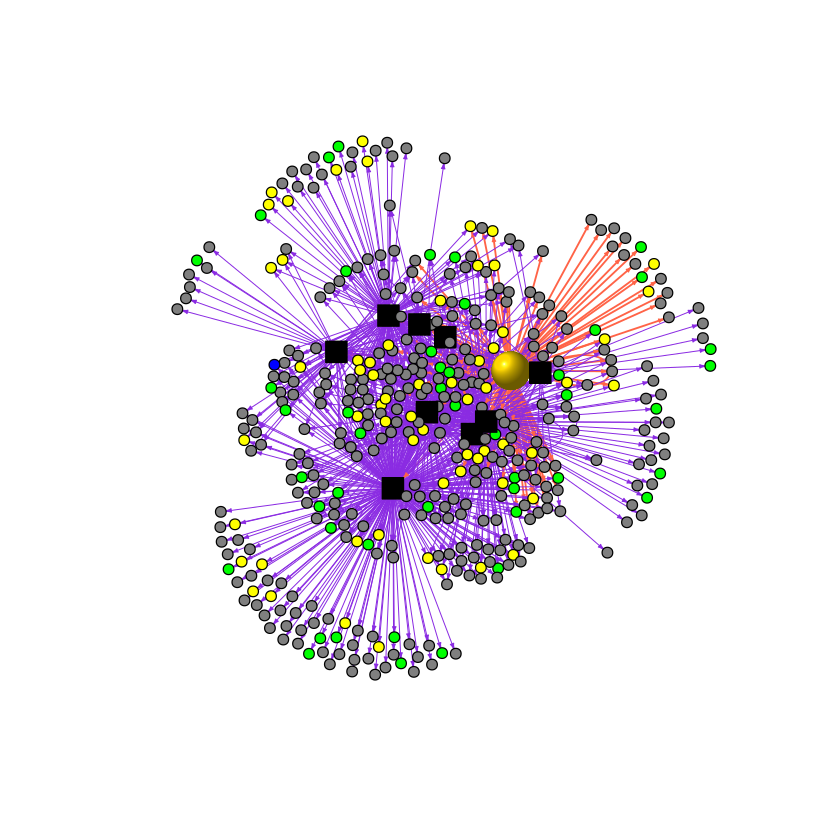

In [183]:
plot(network,vertex.label=NA,edge.arrow.size=.2,edge.color=edge.color,jitter = TRUE,vertex.col=color)
#plot(network,edge.arrow.size=.2,edge.color=edge.color,jitter = TRUE)

In [84]:
lay <- layout.norm(layout.auto(network), -1,1,-1,1)
lay2 <- layout.graphopt(network, niter=1050, start=lay, max.sa.movement=350)
#lay2 <- layout.auto(lay2)

In [41]:
lay2<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/laye1050_350_5.rds")

In [50]:
png("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/laye1050_350_5.png", units="in", width=6.5, height=6.5, res=1000)
plot(network,vertex.frame.color=NA,vertex.label.color="black",vertex.label.font=2 ,vertex.label.cex=1.5,edge.arrow.size=edge.arrow.size,edge.color=edge.color,jitter = TRUE,vertex.col=color, layout=lay2)
dev.off()

png 
  2

In [46]:
pdf("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/laye1050_350_5.pdf", width=10, height=10)
plot(network,vertex.frame.color=NA,vertex.label.color="black",vertex.label.font=2 ,vertex.label.cex=1.5,edge.arrow.size=edge.arrow.size,edge.color=edge.color,jitter = TRUE,vertex.col=color, layout=lay2)
dev.off()

png 
  2

In [241]:
saveRDS(lay2,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/laye1050_350_5.rds")

In [87]:
#table
KO_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)

In [88]:
name<-numeric()
for(i in 1:dim(KO_gene)[1]){
    if(KO_gene[i,1]=="Esr1"){
            name[i]<-"Esr1"
    }else if(KO_gene[i,1] %in% tf){
        name[i]<-"Esr1-TF"
    }else if(KO_gene[i,1] %in% gene_expression){
        name[i]<-"gene_expression"
    }else if(KO_gene[i,1] %in% synapse){
        name[i]<-"synapse_excitability"
    }
        else if(KO_gene[i,1] %in% energy){
        name[i]<-"energy"
    }
        else if(KO_gene[i,1] %in% morphology){
        name[i]<-"morphology"
    }else{
        name[i]<-"Other"
        }
}

In [89]:
KO_gene$name<-name

In [90]:
write.xlsx(KO_gene,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/Esr1DEG_network.xlsx")

# heatmap

In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("xlsx")
#library(mgsa)
library(ggplot2)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}
temp<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode)
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AF" | stim=="P35F"| stim=="P23F"|stim=="OVX")))
MPOA.integrated<-subset(MPOA.integrated,cells=celltype)
Esr1KOF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/Esr1KOF.rds")
new.ident <- c("Mix1","eVgat1","eVgat2","eVgat3","eVglu1","eVglu2","Mix2","eVgat4","eVgat5","eVglu3","Mix3","eVglu4","eVglu5","eVgat6","eVglu6","eVglu7")
names(x = new.ident) <- levels(x =Esr1KOF)
Esr1KOF<- RenameIdents(object =Esr1KOF, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Esr1KOF@assays$RNA@data[,which(Idents(object=Esr1KOF) %in% new.ident[i])]))}
celltype<-c(eVgat3_barcode,eVgat1_barcode)
KO<-subset(Esr1KOF,cells=celltype)
all<-MPOA.integrated
MPOA.integrated<-merge(x=all,y=KO)

In [3]:
Cell_type<-c("Esr1KOF","P23F","OVX","P35F","AF")
#Cell_type<-c("P23F","OVX","P35F","AF")
Cell_type<-factor(Cell_type,levels=Cell_type)

In [4]:
#gene_list<-c("Nfia","Cstf2","Mef2a","Zfp74","Foxo1","Esr1","Zbtb20","Rps10","Zmat4","Creb3l1","Tcf4","Bcl11a","Sox5","Lrrfip1","Zfp280d")
gene_list<-c("Pou6f2","Zfp74","Cstf2","Esr1","Zbtb20","Rps10","Zmat4","Creb3l1","Tcf4","Bcl11a","Sox5","Lrrfip1","Zfp280d")

In [5]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
#Cell_number_t$pct[p]<-100*sum(MPOA.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$zscore[p]<-(mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])-mean(MPOA.integrated@assays$RNA@data[gene_list[i],]))/sd(MPOA.integrated@assays$RNA@data[gene_list[i],])
Cell_number_t$FC[p]<-mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])-mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim!=Cell_type[p]))])
Cell_number_t$percent[p]<- 100*sum(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))]>0)/length(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])  
}
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] Esr1KOF P23F    OVX     P35F    AF      Esr1KOF P23F    OVX     P35F   
[10] AF      Esr1KOF P23F    OVX     P35F    AF      Esr1KOF P23F    OVX    
[19] P35F    AF      Esr1KOF P23F    OVX     P35F    AF      Esr1KOF P23F   
[28] OVX     P35F    AF      Esr1KOF P23F    OVX     P35F    AF      Esr1KOF
[37] P23F    OVX     P35F    AF      Esr1KOF P23F    OVX     P35F    AF     
[46] Esr1KOF P23F    OVX     P35F    AF      Esr1KOF P23F    OVX     P35F   
[55] AF      Esr1KOF P23F    OVX     P35F    AF      Esr1KOF P23F    OVX    
[64] P35F    AF     
Levels: Esr1KOF P23F OVX P35F AF

<ggproto object: Class ScaleDiscretePosition, ScaleDiscrete, Scale, gg>
    aesthetics: x xmin xmax xend
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: waiver
    is_discrete: function
    is_empty: function
    labels: KOF P23F OVX P35F AF
    limits: Esr1KOF P23F OVX P35F AF
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: waiver
    palette: function
    palette.cache: NULL
    position: top
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    range_c: <ggproto object

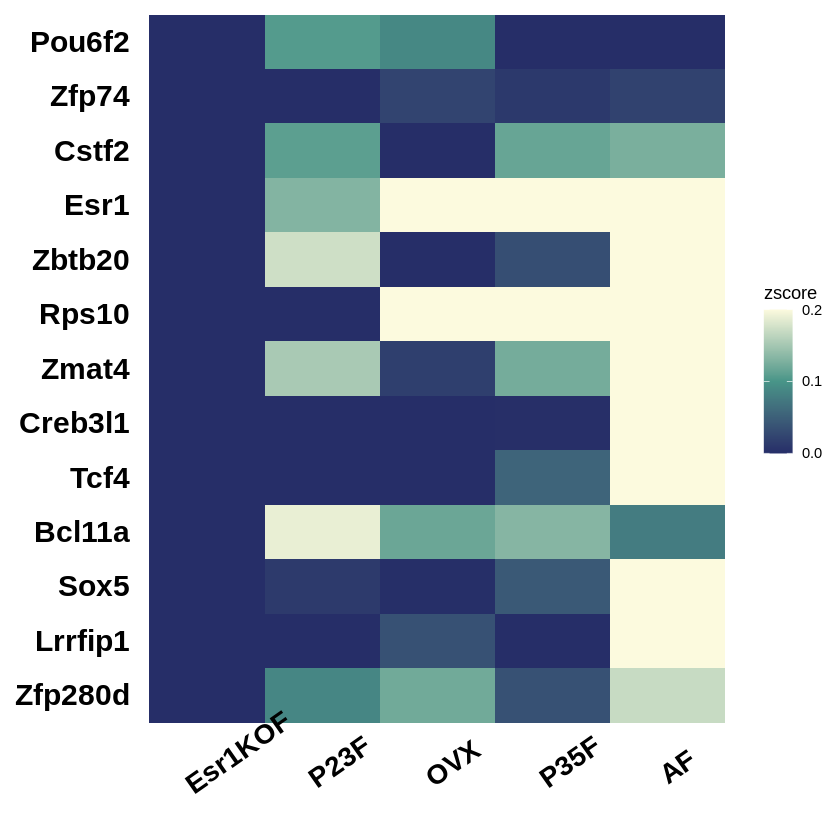

In [6]:
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- -0.0
high<-0.2
p<-ggplot(Cell_number, aes(cluster, gene))+ 
  geom_tile(aes(fill =zscore))+ scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = (low+high)/2,oob=squish)   #scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.1),low = "black",high = "yellow", oob=squish)+
scale_x_discrete(limits = (levels(Cell_number$cluster)),position = "top",labels=c("Esr1KOF" = "KOF","P23F" = "P23F", "OVX" = "OVX","P35F" = "P35F","AF" = "AF"))
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("group")+xlab("genes")+theme(axis.text.x=element_text(size=17,angle = 35, hjust = 0.2,vjust=0.6,color="black",face="bold"),axis.text.y=element_text(size=18,colour = "black",face="bold"),axis.title=element_text(size=0,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line =  element_blank(),axis.ticks.y = element_blank(),axis.ticks.x = element_blank())
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/TF_heatmap_female_TF_zscore_Esr1_3_",low,"_",high,"_mini_color_adjusted.pdf",sep=""),width=3.5,height=4)

# disc plots for additional info for female or common TFs

In [41]:
gene_list<-c("Tcf4","Sox5","Lrrfip1","Zfp280d","Creb3l1","Bcl11a","Esr1","Zbtb20","Rps10","Zmat4")

In [42]:
type<-c("gene_expression","morphology","synapse","energy")
type<-factor(type,levels=type)

In [43]:
regulons<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/regulons_indirect.rds")

In [44]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(type)

Cell_number_t<- data.frame("cluster" =type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(type)){
Cell_number_t$number[p]<-sum(regulons[[gene_list[i]]] %in% eval(parse(text=as.character(type[p])))) 
}
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] gene_expression morphology      synapse         energy         
 [5] gene_expression morphology      synapse         energy         
 [9] gene_expression morphology      synapse         energy         
[13] gene_expression morphology      synapse         energy         
[17] gene_expression morphology      synapse         energy         
[21] gene_expression morphology      synapse         energy         
[25] gene_expression morphology      synapse         energy         
[29] gene_expression morphology      synapse         energy         
[33] gene_expression morphology      synapse         energy         
[37] gene_expression morphology      synapse         energy         
Levels: gene_expression morphology synapse energy

In [45]:
max(Cell_number$number)

[1] 84

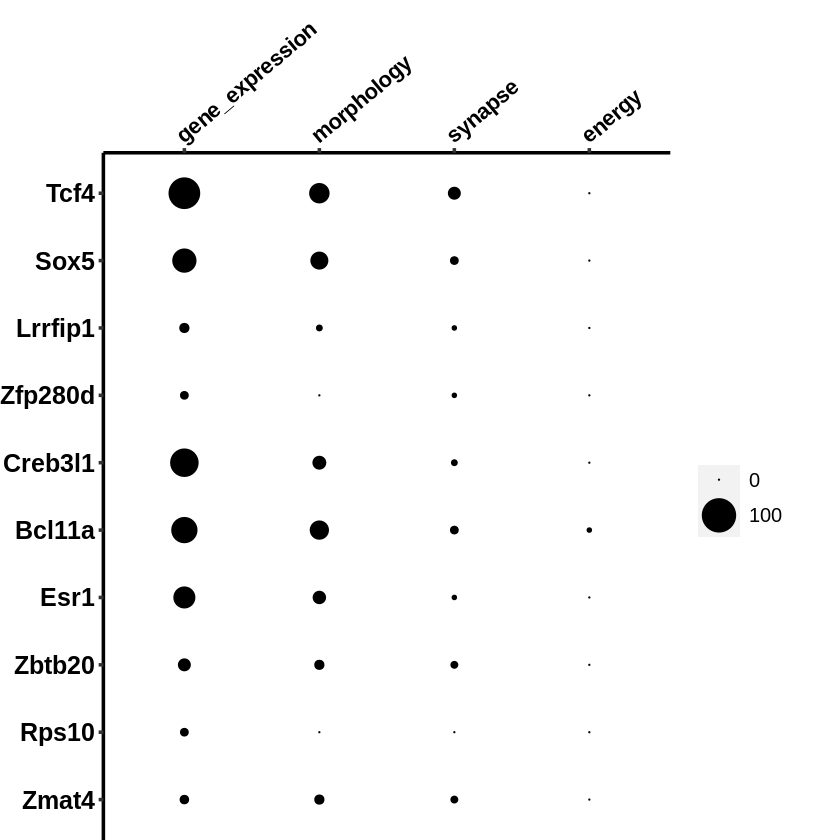

In [64]:
#disc
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = number), colour="black") + 
scale_x_discrete(limits = (levels(Cell_number$cluster)),position = "top")+scale_y_discrete(limits =(levels(Cell_number$gene)))+
 scale_size_continuous(range = c(0,9),limits=c(0,100),breaks=seq(0,100,100))+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=13,angle = 40, hjust = 0,vjust=-3,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.text=element_text(size=12),legend.title=element_blank(),legend.position ="right",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 28, 0, 0))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/discplot_femaleTF_what gnee.pdf",height=3.7, width=3.0 , paper = "letter")

In [46]:
#dimorphic genes 

In [3]:
test<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/male/regulons_indirect.rds")
sum<-c(test$Esr1,test$Zbtb20,test$Pou6f2,test$Rps10,test$Zmat4,test$Cstf2,test$Zfp74)
sum<-unique(sum)
TF<-names(test)
#male_sum<-unique(c(sum,TF))
male_sum<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/DEG/gene_adjust_0.1_0.1_246vs34.xlsx",sheetIndex=1)[,1]
test<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/regulons_indirect.rds")
sum<-c(test$Esr1,test$Zbtb20,test$Crev3l1,test$Tcf4,test$Rps10,test$Bcl11a,test$Sox5,test$Zmat4,test$Lrrfip1,test$Zfp280d)
sum<-unique(sum)
TF<-names(test)
#female_sum<-unique(c(sum,TF))
female_sum<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)[,1]
common_gene<-intersect(male_sum,female_sum)
dimorphic_gene<-female_sum[!(female_sum %in% common_gene)]
length(dimorphic_gene)
length(common_gene)
length(female_sum)

[1] 481

[1] 343

[1] 824

In [4]:
gene_list<-c("Tcf4","Sox5","Lrrfip1","Zfp280d","Creb3l1","Bcl11a","Esr1","Zbtb20","Rps10","Zmat4")
type<-c("common_gene","dimorphic_gene")
type<-factor(type,levels=type)
regulons<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/regulons_indirect.rds")
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
regulated_dimorphic_gene<-numeric()
regulated_common_gene<-numeric()

for (i in 1:length(gene_list)){
L<-length(type)

Cell_number_t<- data.frame("cluster" =type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(type)){
Cell_number_t$number[p]<-sum(regulons[[gene_list[i]]] %in% eval(parse(text=as.character(type[p])))) 
if(type[p]=="common_gene"){regulated_common_gene<-c(regulated_common_gene,regulons[[gene_list[i]]][regulons[[gene_list[i]]] %in% eval(parse(text=as.character(type[p])))])}
else if(type[p]=="dimorphic_gene"){regulated_dimorphic_gene<-c(regulated_dimorphic_gene,regulons[[gene_list[i]]][regulons[[gene_list[i]]] %in% eval(parse(text=as.character(type[p])))])}
}
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] common_gene    dimorphic_gene common_gene    dimorphic_gene common_gene   
 [6] dimorphic_gene common_gene    dimorphic_gene common_gene    dimorphic_gene
[11] common_gene    dimorphic_gene common_gene    dimorphic_gene common_gene   
[16] dimorphic_gene common_gene    dimorphic_gene common_gene    dimorphic_gene
Levels: common_gene dimorphic_gene

In [5]:
max(Cell_number$number)

[1] 164

In [7]:
library(ggplot2)

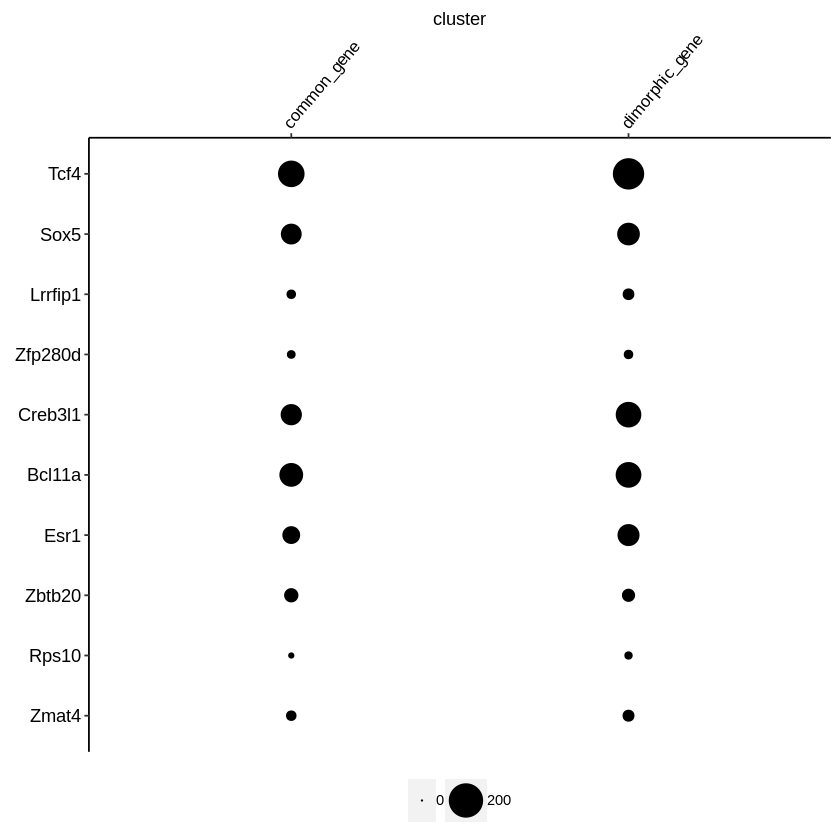

In [8]:
#disc
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = number), colour="black") + 
scale_x_discrete(limits = (levels(Cell_number$cluster)),position = "top")+scale_y_discrete(limits =(levels(Cell_number$gene)))+
 scale_size_continuous(range = c(0,9),limits=c(0,200),breaks=seq(0,200,200))+
theme(axis.title.y=element_text(size=0),axis.text.y=element_text(size=11,color="black"),axis.text.x=element_text(size=10,angle = 50, hjust = -0,vjust=3,color="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position ="bottom",legend.title = element_text(color = "blue", size = 0),)
ggsave(file="/home/garret/Documents/R code/discplot_femaleTFcommon_dimorphic.pdf",height=3.3, width=2.5 , paper = "letter")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/discplot_femaleTF_commondimorphic.pdf",height=4.2, width=1.6, paper = "letter")

In [9]:
percentage<-numeric()
for(i in 1:dim(Cell_number)[1]){
    if(Cell_number$cluster[i]=="common_gene"){
        percentage[i]<-100*Cell_number$number[i]/length(regulated_common_gene)
    }else if(Cell_number$cluster[i]=="dimorphic_gene"){
        percentage[i]<-100*Cell_number$number[i]/length(regulated_dimorphic_gene)
    }
}
Cell_number$percentage_of_genes<-percentage

In [10]:
sum(subset(Cell_number,cluster=="common_gene")$number)
sum(subset(Cell_number,cluster=="dimorphic_gene")$number)

[1] 451

[1] 609

In [11]:
library(ggplot2)

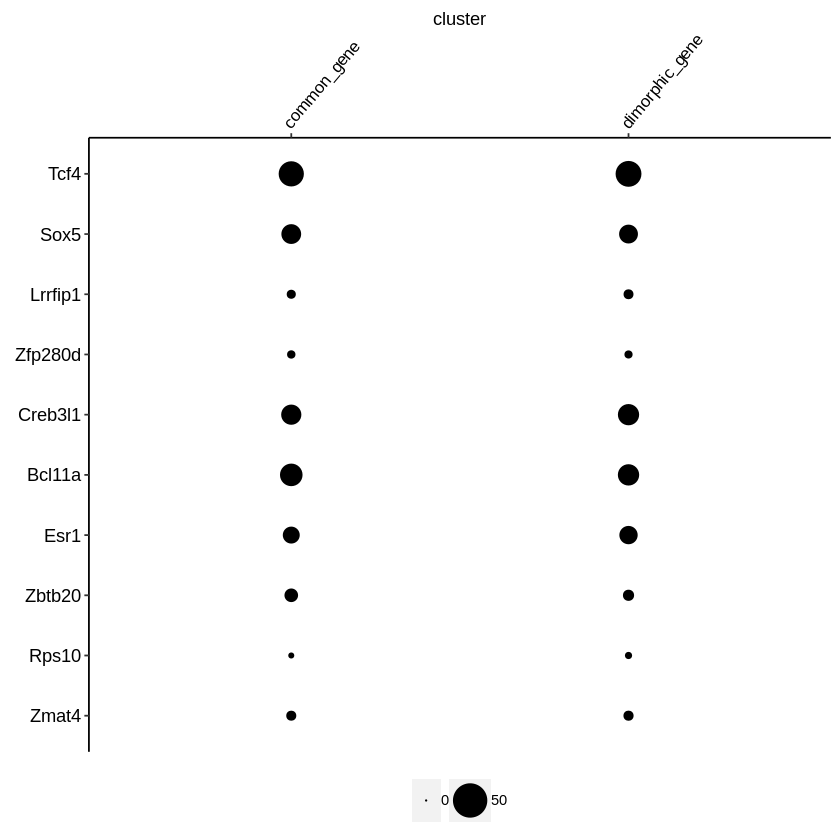

In [12]:
#perentage
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = percentage_of_genes), colour="black") + 
scale_x_discrete(limits = (levels(Cell_number$cluster)),position = "top")+scale_y_discrete(limits =(levels(Cell_number$gene)))+
 scale_size_continuous(range = c(0,9),limits=c(0,50),breaks=seq(0,50,50))+
theme(axis.title.y=element_text(size=0),axis.text.y=element_text(size=11,color="black"),axis.text.x=element_text(size=10,angle = 50, hjust = -0,vjust=3,color="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position ="bottom",legend.title = element_text(color = "blue", size = 0),)

ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/discplot_femaleTF_commondimorphic_percentage.pdf",height=4.2, width=1.6 , paper = "letter")

In [13]:
write.xlsx2(Cell_number,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/TF_dimorphic_monomorphic genes regulations.xlsx")

In [14]:
saveRDS(regulated_dimorphic_gene,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/Esr1_regulated_female_dimorphic_gene.rds")